# Loan Eligibility Prediction

### import require packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# 1. Load the Dataset

In [3]:
df = pd.read_csv("Loan_default.csv")

# 2. Perform Exploratory Data Analysis or Data preprocessing

In [4]:
df.shape

(255347, 18)

In [5]:
df.head()

LoanID   Age   Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96  56.0  85994.0     50587.0          520              80   
1  HPSK72WA7R  69.0  50432.0    124440.0          458              15   
2  C1OZ6DPJ8Y  46.0  84208.0    129188.0          451              26   
3  V2KKSFM3UN  32.0  31713.0     44799.0          743               0   
4  EY08JDHTZP  60.0  20437.0      9139.0          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4         NaN        0

## 1. Missing Values

In [6]:
df.isnull().sum()

LoanID             0
Age               21
Income            51
LoanAmount         1
CreditScore        0
MonthsEmployed     0
NumCreditLines     0
InterestRate       0
LoanTerm           0
DTIRatio           1
Education         14
EmploymentType     0
MaritalStatus     26
HasMortgage       15
HasDependents     25
LoanPurpose       34
HasCoSigner       12
Default            0
dtype: int64

In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Age 0.0001  % missing values
Income 0.0002  % missing values
Education 0.0001  % missing values
MaritalStatus 0.0001  % missing values
HasMortgage 0.0001  % missing values
HasDependents 0.0001  % missing values
LoanPurpose 0.0001  % missing values
HasCoSigner 0.0  % missing values


In [8]:
# Fill value by mean mode 

df['Income'].fillna(df['Income'].mean(), inplace=True)

df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0],inplace=True)
df['HasMortgage'].fillna(df['HasMortgage'].mode()[0],inplace=True)
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True) 
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True)                        

df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## 2. Numerical Variables

In [10]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  56.0  85994.0     50587.0          520              80               4   
1  69.0  50432.0    124440.0          458              15               1   
2  46.0  84208.0    129188.0          451              26               3   
3  32.0  31713.0     44799.0          743               0               3   
5  25.0  90298.0     90448.0          720              18               2   

   InterestRate  LoanTerm  DTIRatio  Default  
0         15.23        36      0.44        0  
1          4.81        60      0.68        0  
2         21.17        24      0.31        1  
3          7.07        24      0.23        0  
5         22.72        24      0.10        1

In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


### Discrete variable

In [12]:
discrete_feature


['NumCreditLines', 'LoanTerm', 'Default']

In [13]:
df[discrete_feature].head()


NumCreditLines  LoanTerm  Default
0               4        36        0
1               1        60        0
2               3        24        1
3               3        24        0
5               2        24        1

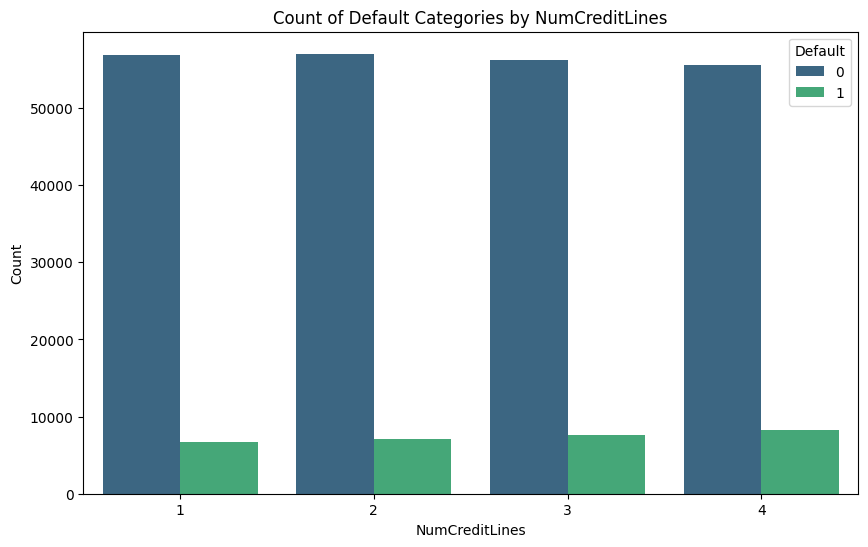

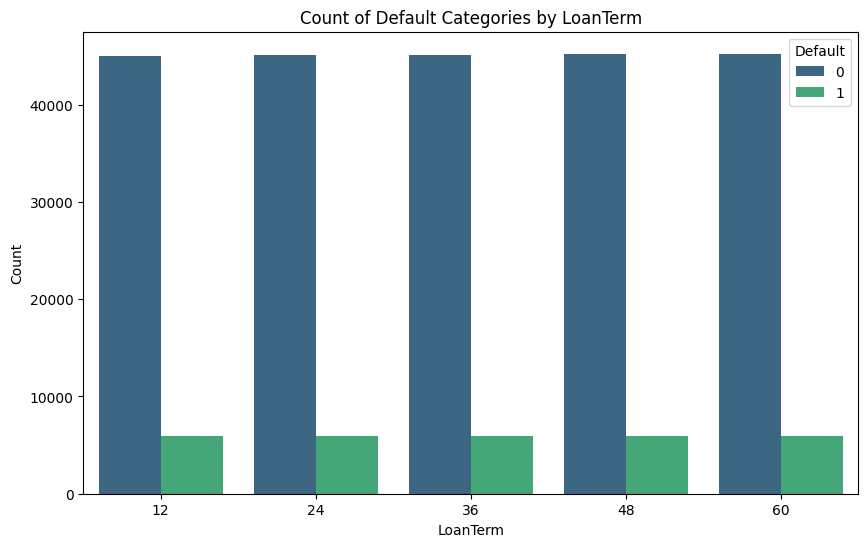

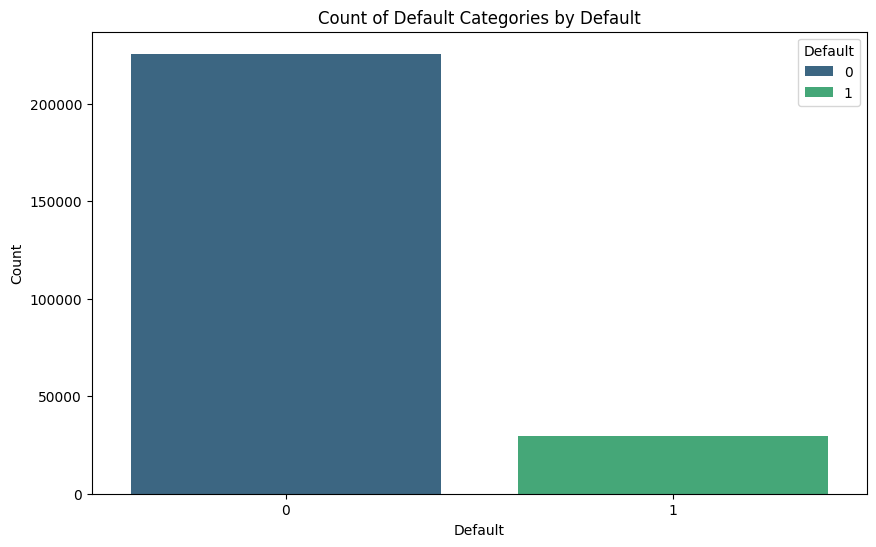

In [14]:
## Lets Find the realtionship between them and Loan eligibility

for feature in discrete_feature:
    data = df.copy()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Default', data=data, palette='viridis')
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Default Categories by {feature}')
    plt.legend(title='Default', loc='upper right')
    plt.show()

### Continuous Variable

In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


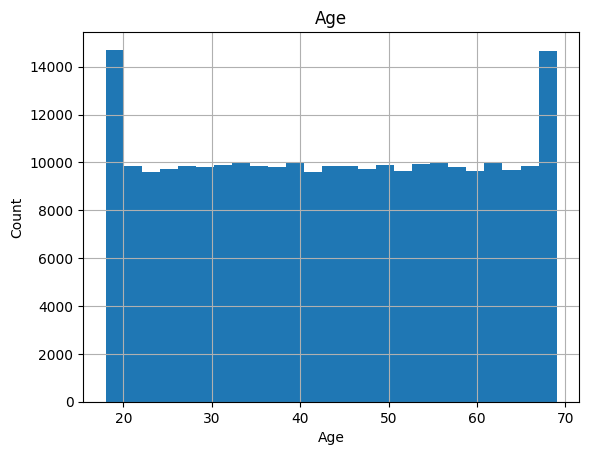

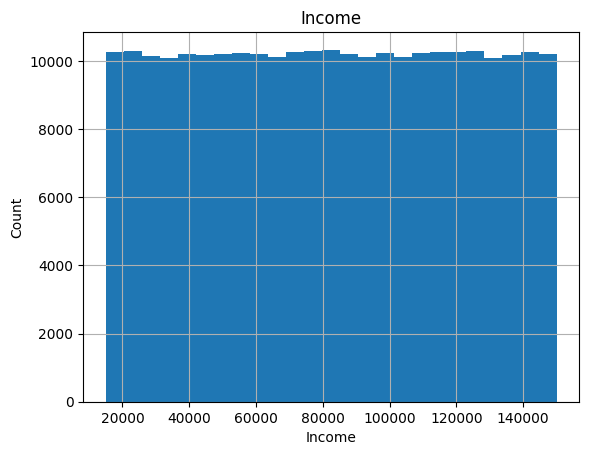

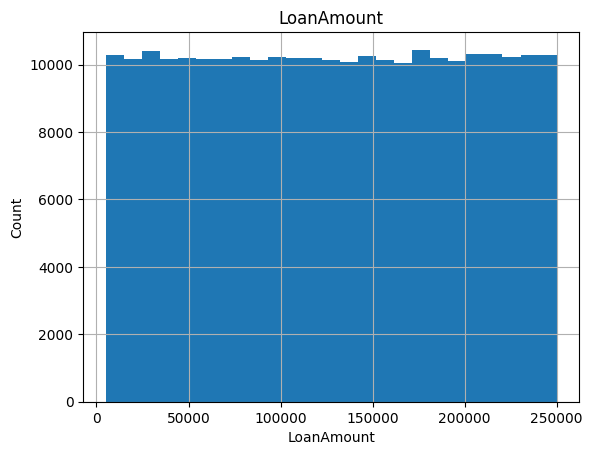

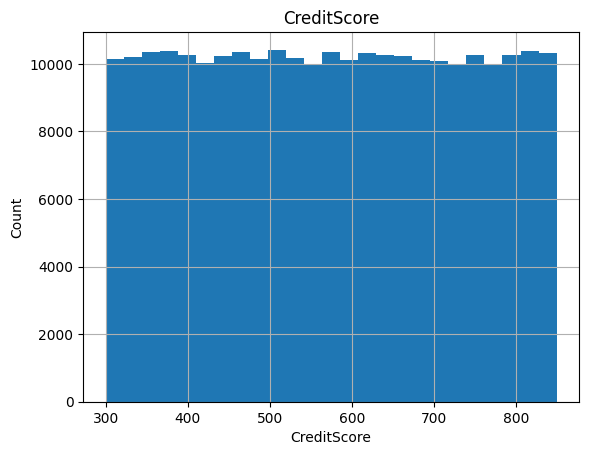

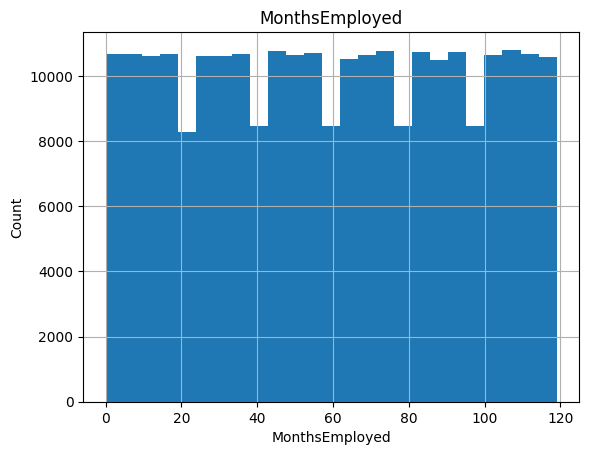

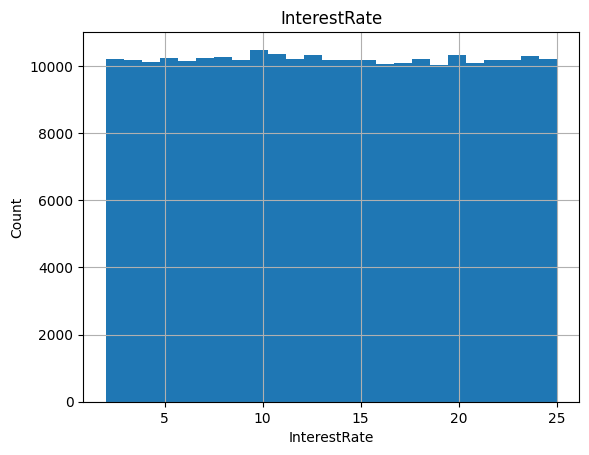

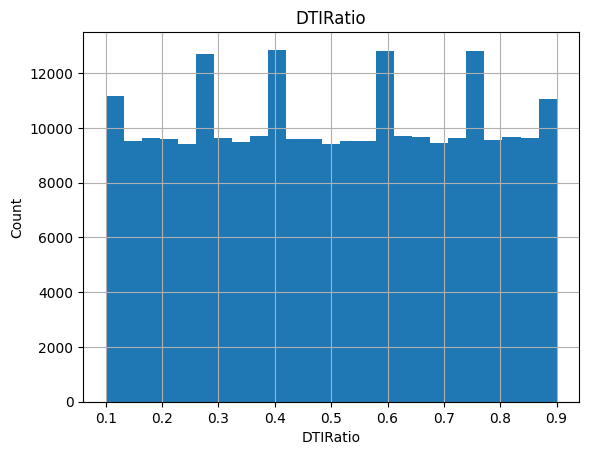

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

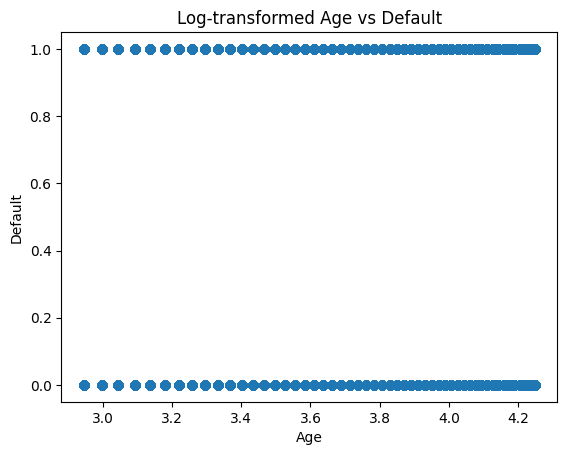

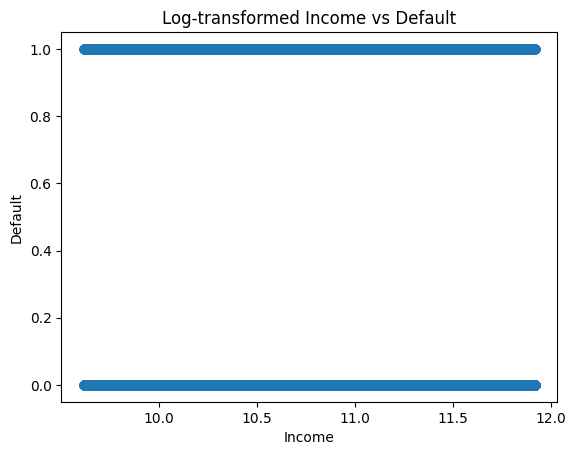

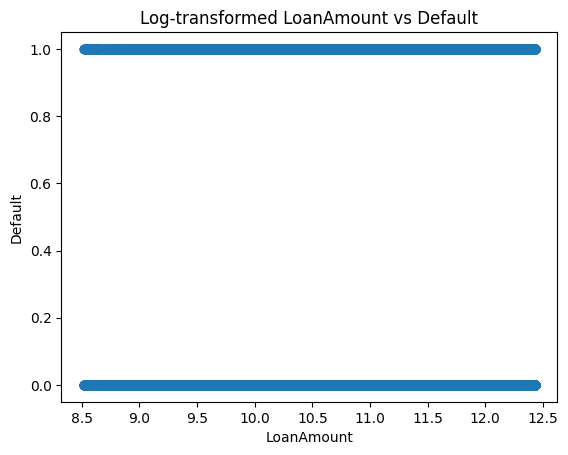

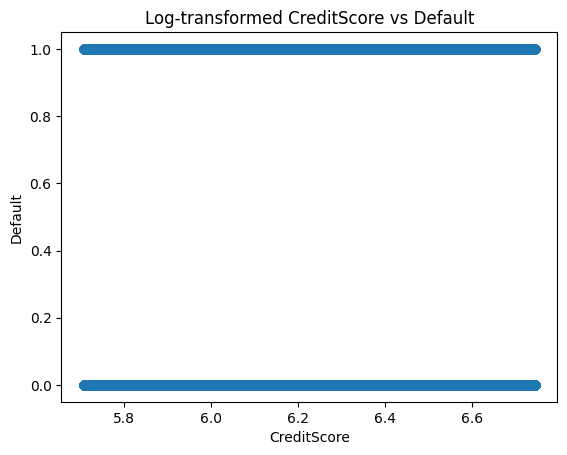

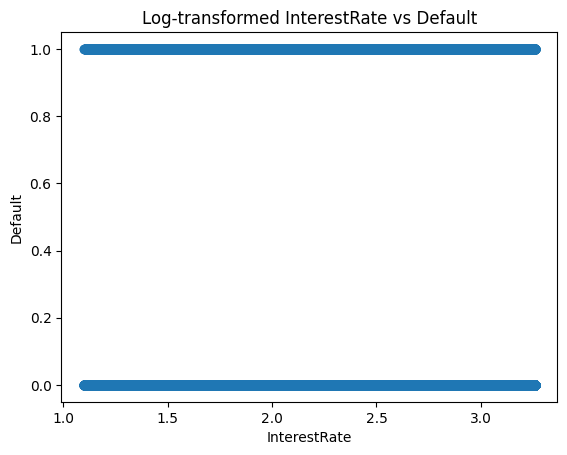

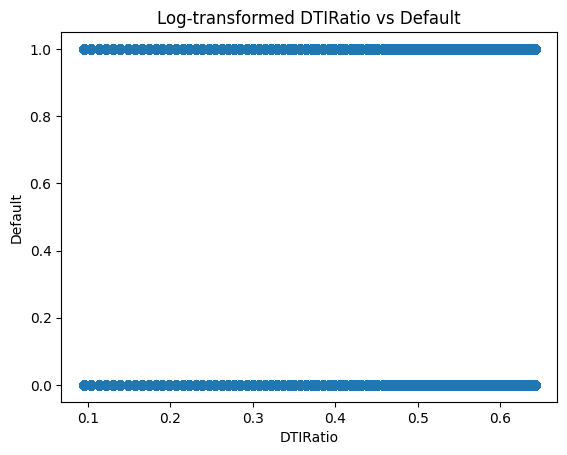

In [17]:
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        plt.scatter(data[feature], data['Default'])
        plt.xlabel(feature)
        plt.ylabel('Default')
        plt.title(f'Log-transformed {feature} vs Default')
        plt.show()

## 3.Outliers

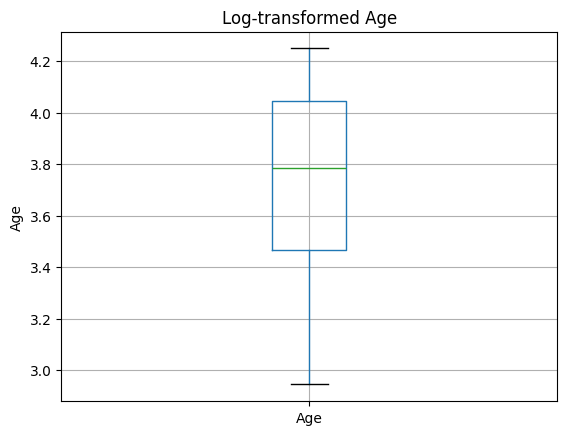

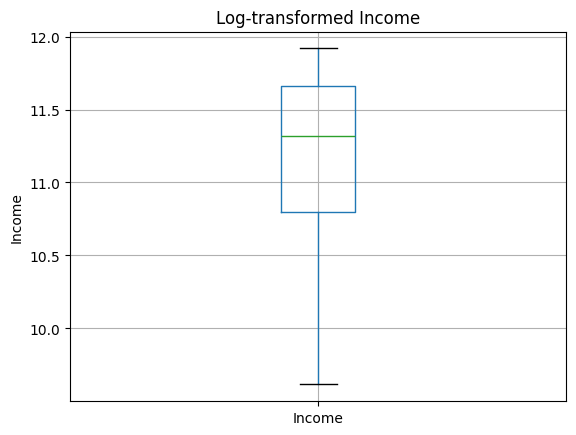

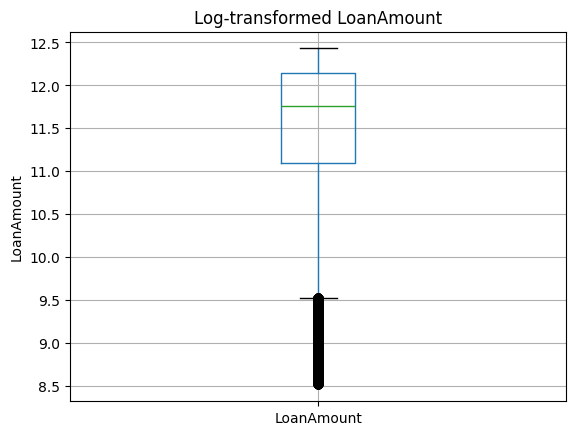

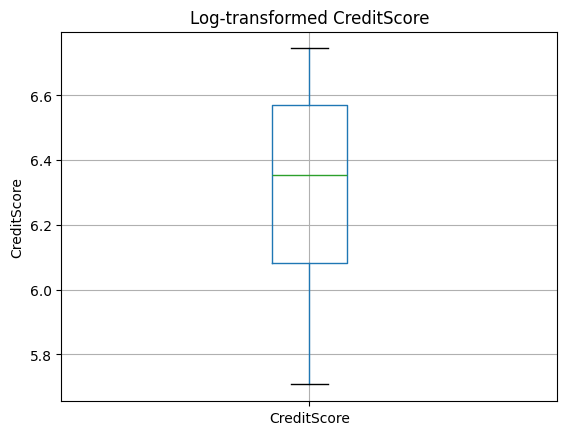

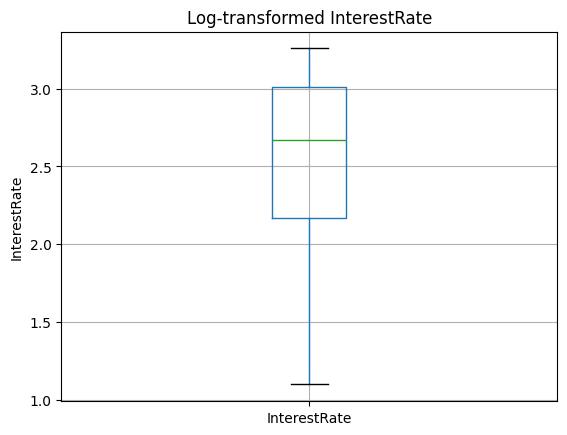

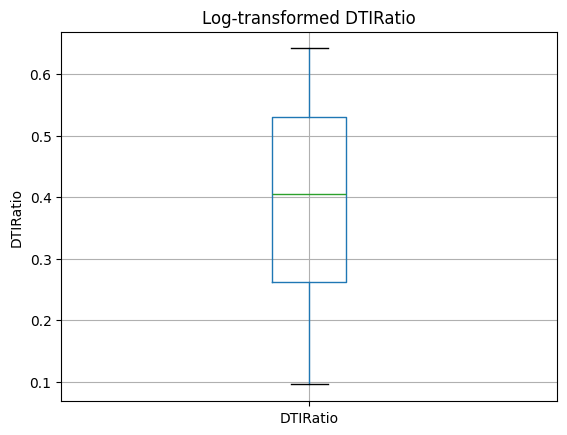

In [18]:
# Plot boxplots for log-transformed features
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(f'Log-transformed {feature}')
        plt.show()

### Categorical Variables


In [19]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']

if 'LoanID' in categorical_features:
    categorical_features.remove('LoanID')

categorical_features
categorical_features

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [20]:
df[categorical_features].head()


Education EmploymentType MaritalStatus HasMortgage HasDependents  \
0   Bachelor's      Full-time      Divorced         Yes           Yes   
1     Master's      Full-time       Married          No            No   
2     Master's     Unemployed      Divorced         Yes           Yes   
3  High School      Full-time       Married          No            No   
5  High School     Unemployed       Married         Yes            No   

  LoanPurpose HasCoSigner  
0       Other         Yes  
1       Other         Yes  
2        Auto          No  
3    Business          No  
5    Business         Yes

In [21]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Education and number of categories are 4
The feature is EmploymentType and number of categories are 4
The feature is MaritalStatus and number of categories are 3
The feature is HasMortgage and number of categories are 2
The feature is HasDependents and number of categories are 2
The feature is LoanPurpose and number of categories are 5
The feature is HasCoSigner and number of categories are 2


### Find out the relationship between categorical variable and dependent feature Default


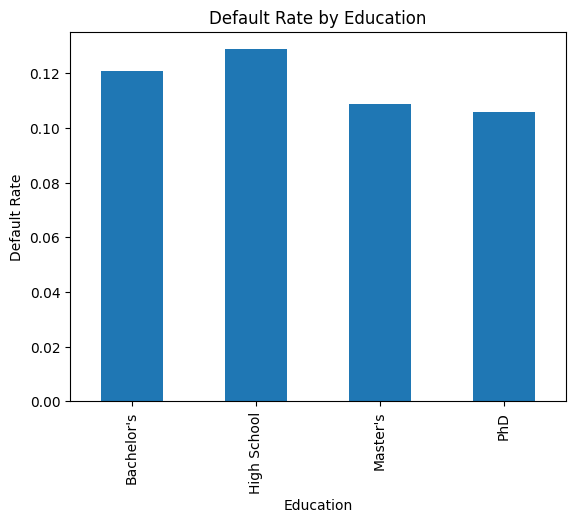

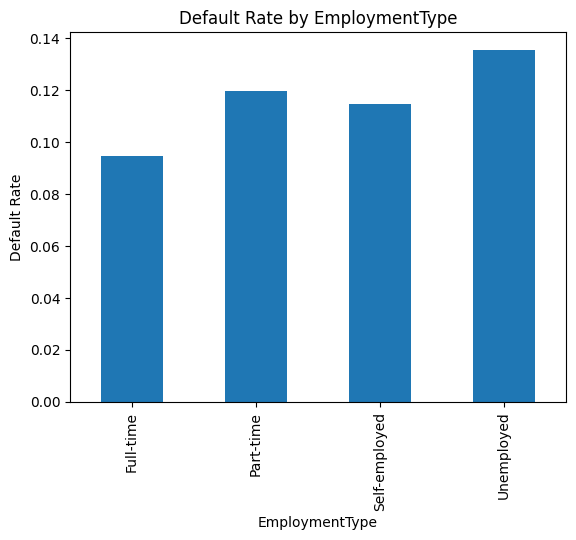

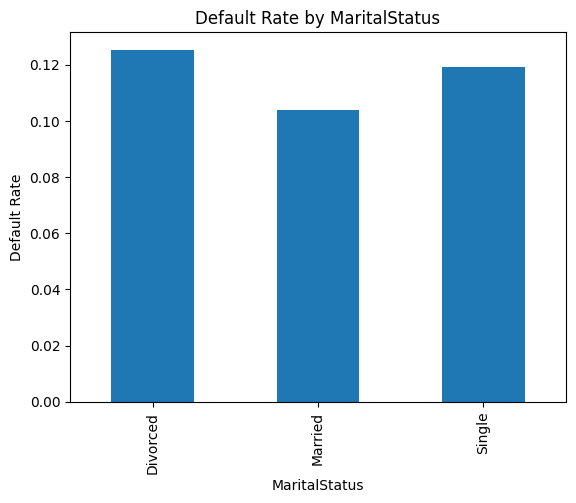

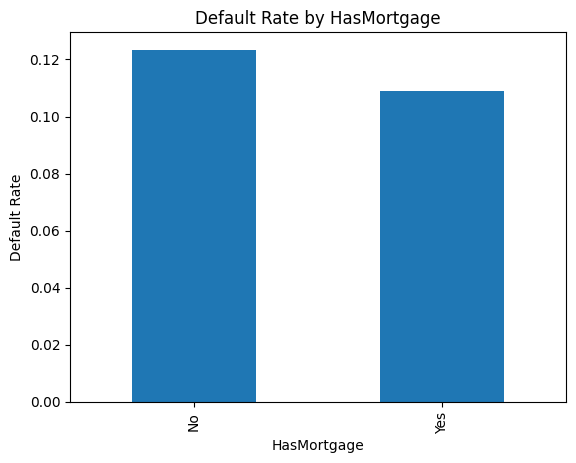

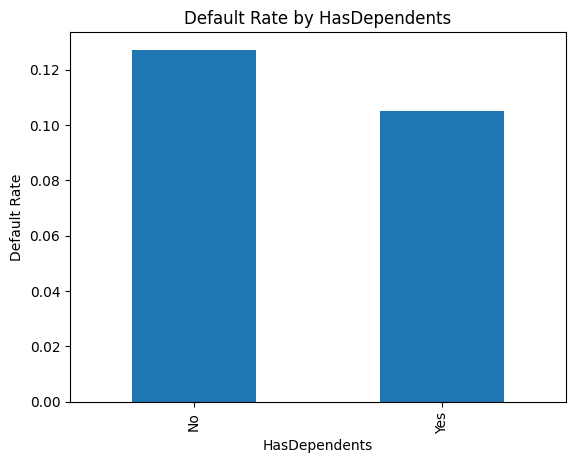

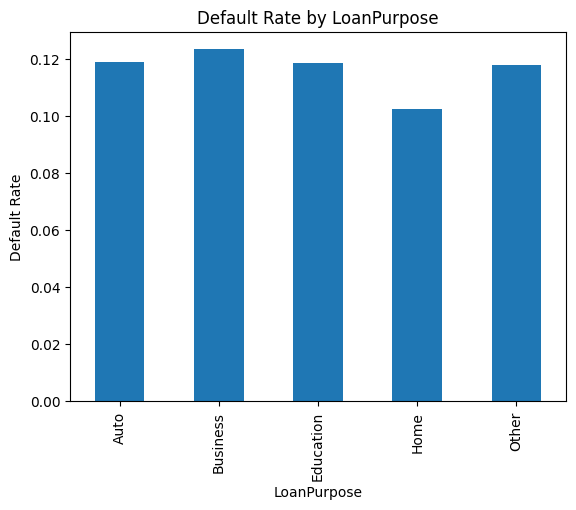

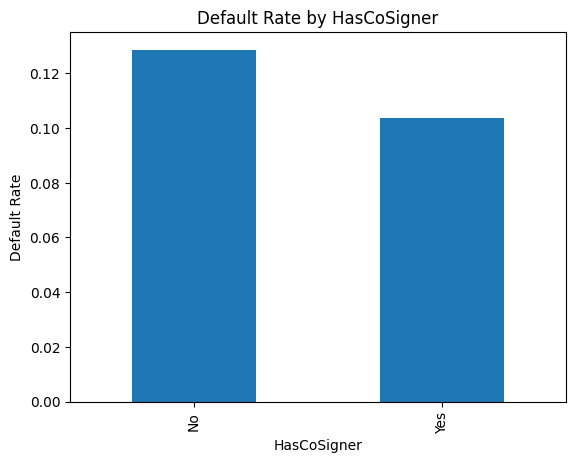

In [26]:
# Plot default rate (mean of 'Default') for each categorical feature
for feature in categorical_features:
    data = df.copy()
    default_rate = data.groupby(feature)['Default'].mean()
    default_rate.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.title(f'Default Rate by {feature}')
    plt.show()

## 4. Label encoding

In [40]:
# convort the categorical into numerical 
from sklearn.preprocessing import LabelEncoder

df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['EmploymentType'] = LabelEncoder().fit_transform(df['EmploymentType'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['HasMortgage'] = LabelEncoder().fit_transform(df['HasMortgage'])
df['HasDependents'] = LabelEncoder().fit_transform(df['HasDependents'])
df['LoanPurpose'] = LabelEncoder().fit_transform(df['LoanPurpose'])
df['HasCoSigner'] = LabelEncoder().fit_transform(df['HasCoSigner'])

## 5. Deal with imbalanced Data

In [41]:
df['Default'].value_counts()

0    225650
1     29649
Name: Default, dtype: int64

### Balancing data by using under sampling majority class

In [42]:
# separate the class 1, 0 count 
class_0_count, class_1_count = df['Default'].value_counts()

# separate  the class 1, 0 into 2 df
df_class_0 = df[df['Default']==0]
df_class_1 = df[df['Default']==1]

print(df_class_0['Default'].value_counts())
print(df_class_1['Default'].value_counts())

0    225650
Name: Default, dtype: int64
1    29649
Name: Default, dtype: int64


In [43]:
df_class_0_under = df_class_0.sample(30351)

balance_df_by_under = pd.concat([df_class_1, df_class_0_under],axis= 0)
balance_df_by_under.value_counts()

LoanID      Age   Income    LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default
000ELHLBPV  37.0  81658.0   152598.0    792          23              4               14.06         24        0.86      3          2               1              1            0              0            0            1          1
O1T7R4DMUA  50.0  143607.0  224181.0    556          31              2               24.95         36        0.26      3          3               2              0            0              1            1            1          1
O1JI92BYV7  43.0  17610.0   229558.0    309          9               4               6.04          36        0.54      0          0               0              0            0              2            0            1          1
O1KYVT9EB9  67.0  49438.0   166426.0    648          44              4               5.51    

# 2. Feature Selection

### Split the data set into x and y

In [44]:
x = balance_df_by_under[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner']]
print(x.head())
y = balance_df_by_under['Default']
y.head()
balance_df_by_under.value_counts()

     Age    Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
2   46.0   84208.0    129188.0          451              26               3   
5   25.0   90298.0     90448.0          720              18               2   
8   36.0   42053.0     92357.0          827              83               1   
11  28.0  149227.0    139759.0          375              56               3   
18  19.0   40718.0     78515.0          319             119               2   

    InterestRate  DTIRatio  Education  EmploymentType  HasMortgage  \
2          21.17      0.31          2               3            1   
5          22.72      0.10          1               3            1   
8          23.94      0.20          0               2            1   
11          5.84      0.80          3               0            0   
18         14.00      0.17          0               2            1   

    HasDependents  LoanPurpose  HasCoSigner  
2               1            0            0  
5           

LoanID      Age   Income    LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default
000ELHLBPV  37.0  81658.0   152598.0    792          23              4               14.06         24        0.86      3          2               1              1            0              0            0            1          1
O1T7R4DMUA  50.0  143607.0  224181.0    556          31              2               24.95         36        0.26      3          3               2              0            0              1            1            1          1
O1JI92BYV7  43.0  17610.0   229558.0    309          9               4               6.04          36        0.54      0          0               0              0            0              2            0            1          1
O1KYVT9EB9  67.0  49438.0   166426.0    648          44              4               5.51    

### Scaling the data

In [45]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x),columns=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'])
x.head()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.549020  0.512671    0.506894     0.275046        0.218487   
1  0.137255  0.557784    0.348770     0.765027        0.151261   
2  0.352941  0.200400    0.356562     0.959927        0.697479   
3  0.196078  0.994311    0.550041     0.136612        0.470588   
4  0.019608  0.190511    0.300064     0.034608        1.000000   

   NumCreditLines  InterestRate  DTIRatio  Education  EmploymentType  \
0        0.666667      0.833478    0.2625   0.666667        1.000000   
1        0.333333      0.900870    0.0000   0.333333        1.000000   
2        0.000000      0.953913    0.1250   0.000000        0.666667   
3        0.666667      0.166957    0.8750   1.000000        0.000000   
4        0.333333      0.521739    0.0875   0.000000        0.666667   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  
0          1.0            1.0         0.00          0.0  
1          1.0            0.0         0.25          1.0  
2          1.0            0.0         0.50          0.0  
3          0.0            0.0         0.50          1.0  
4          1.0            0.0         0.50          0.0

## Split the data into training and testing dataset

In [46]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=12350, stratify=y)

# 3. Model Building

In [47]:
class Models:
    def __init__(self ,X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        

    # Built the Logistic Regression model
    def model_LG(self):
        from sklearn.linear_model import LogisticRegressionCV
        model_lg = LogisticRegressionCV().fit(self.X_train, self.Y_train)
        return model_lg

    # Built the Naive Bayes 
    def model_NB(self):
        from sklearn.naive_bayes import GaussianNB
        model_nb = GaussianNB().fit(self.X_train, self.Y_train)
        return model_nb

    # Built the KNN model
    def model_KNN(self):
        from sklearn.neighbors import KNeighborsClassifier
        model_knn = KNeighborsClassifier().fit(self.X_train, self.Y_train)
        return model_knn

    # Built the Support Vector Machine
    def model_SVM(self):
        from sklearn.svm import SVC
        model_svm = SVC(C=3.0).fit(self.X_train, self.Y_train)
        return model_svm
        
    # Built the Decison tree model 
    def model_DT(self):
        from sklearn.tree import DecisionTreeClassifier
        model_dt = DecisionTreeClassifier().fit(self.X_train, self.Y_train)
        return model_dt

    # Built the model for Random forest
    def model_Rand_forest(self):
        from sklearn.ensemble import RandomForestClassifier
        model_rand_forest = RandomForestClassifier().fit(self.X_train, self.Y_train)
        return model_rand_forest

    # Built the catboost model
    def model_Cat_Boost(self):
        from catboost import CatBoostClassifier
        model_catboost = CatBoostClassifier().fit(self.X_train, self.Y_train)
        return model_catboost

    # Built the adaboost model
    def model_Ada_Boost(self):
        from sklearn.ensemble import AdaBoostClassifier
        model_adaboost = AdaBoostClassifier().fit(self.X_train, self.Y_train)
        return model_adaboost

    def model_XG_Boost(self):
        from xgboost import XGBClassifier
        model_xgboost = XGBClassifier().fit(self.X_train, self.Y_train)
        return model_xgboost

## Model Evaluation code

In [48]:
class Model_Evaluation_class:
    def __init__(self ,x_test, y_test):
        self.x_test = x_test
        self.y_test = y_test

    def Classification_Report(self, model):
        from sklearn.metrics import classification_report
        return classification_report(self.y_test, model.predict(self.x_test))

    def model_evaluate(self, model, model_name):
        from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
        
        Accuracy = accuracy_score(self.y_test, model.predict(self.x_test))
        Precision = precision_score(self.y_test, model.predict(self.x_test))
        Recall = recall_score(self.y_test, model.predict(self.x_test))
        f1_Score = f1_score(self.y_test, model.predict(self.x_test))
        return model_name,Accuracy,Precision,Recall,f1_Score

### Build multiple model

In [56]:
m2 = Models(X_train,Y_train)
models = [(m2.model_LG(),"LogisticRegression",(0,0)),(m2.model_KNN(), "KNeighborsClassifier",(0,1)),
          (m2.model_NB(),"Naive Bayes",(1,0)),(m2.model_SVM(),"Support Vector Machine",(1,1)),
          (m2.model_DT(),"DecisionTreeClassifier",(2,0)),(m2.model_Rand_forest(),"RandomForest",(2,1)),
         (m2.model_Ada_Boost(), "AdaBoost",(3,0)), (m2.model_Cat_Boost(),"Cat_Boost",(3,1)),
         (m2.model_XG_Boost(), "XGBoost",(4,0))]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.050823
0:	learn: 0.6852644	total: 58.9ms	remaining: 58.8s
1:	learn: 0.6782289	total: 64.8ms	remaining: 32.4s
2:	learn: 0.6717356	total: 68.4ms	remaining: 22.7s
3:	learn: 0.6658278	total: 71.5ms	remaining: 17.8s
4:	learn: 0.6600162	total: 74.4ms	remaining: 14.8s
5:	learn: 0.6553139	total: 77.5ms	remaining: 12.8s
6:	learn: 0.6504570	total: 80.6ms	remaining: 11.4s
7:	learn: 0.6461141	total: 83.5ms	remaining: 10.4s
8:	learn: 0.6424822	total: 86.2ms	remaining: 9.49s
9:	learn: 0.6390714	total: 89ms	remaining: 8.81s
10:	learn: 0.6360127	total: 92ms	remaining: 8.27s
11:	learn: 0.6331722	total: 95.2ms	remaining: 7.84s
12:	learn: 0.6305008	total: 98.2ms	remaining: 7.46s
13:	learn: 0.6278822	total: 101ms	remaining: 7.12s
14:	learn: 0.6255741	total: 104ms	remaining: 6.84s
15:	learn: 0.6235676	total: 107ms	remaining: 6.58s
16:	learn: 0.6217528	total: 110ms	remaining: 6.36s
17:	learn: 0.6199592	total: 113ms	remaining: 6.16s
18:	learn: 0.6183113	total: 116ms	remaining: 5.99s
19

## Evaluate all models


In [57]:
model_evaluation_obj = Model_Evaluation_class(x_test, y_test)
Results2 = []
for model,model_name,_ in models:
    Results2.append(model_evaluation_obj.model_evaluate(model, model_name))

df2 = pd.DataFrame(Results2,columns=['Algorithm','Accuracy', 'Precision', 'Recall', 'F1_Score'])
df2

Algorithm  Accuracy  Precision    Recall  F1_Score
0      LogisticRegression  0.678556   0.672397  0.681619  0.676976
1    KNeighborsClassifier  0.625167   0.619946  0.624058  0.621996
2             Naive Bayes  0.680167   0.672039  0.689039  0.680433
3  Support Vector Machine  0.680611   0.676069  0.679033  0.677548
4  DecisionTreeClassifier  0.587778   0.582559  0.585048  0.583801
5            RandomForest  0.682556   0.683174  0.666892  0.674935
6                AdaBoost  0.680222   0.675070  0.680382  0.677716
7               Cat_Boost  0.683889   0.680849  0.678246  0.679545
8                 XGBoost  0.672222   0.669842  0.663969  0.666893

## Classification report for all models

In [58]:
for model,model_name,_ in models:
    print(f"Classification report for {model_name} is :")
    print(model_evaluation_obj.Classification_Report(model))
    print("-"*80)

Classification report for LogisticRegression is :
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      9105
           1       0.67      0.68      0.68      8895

    accuracy                           0.68     18000
   macro avg       0.68      0.68      0.68     18000
weighted avg       0.68      0.68      0.68     18000

--------------------------------------------------------------------------------
Classification report for KNeighborsClassifier is :
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      9105
           1       0.62      0.62      0.62      8895

    accuracy                           0.63     18000
   macro avg       0.63      0.63      0.63     18000
weighted avg       0.63      0.63      0.63     18000

--------------------------------------------------------------------------------
Classification report for Naive Bayes is :
              precision    recall  f1-s